In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

# קריאה וכתיבה מקבצים

## קבצים ותיקיות

- **קובץ במחשב** הוא משאב לאחסון מידע — "מסמך" דיגיטלי

- קבצים מאורגנים ב**תיקיות** (directories)

- לכל קובץ יש כתובת (path) במערכת הקבצים של המחשב  
   - לדוגמה: `C:\Desktop\lecture_4
ile.txt`

- הסיומת של הקובץ (extension) מסמלת את סוג התוכן (txt, exe, mp3, avi, jpg)  
   - קבצי טקסט מורכבים מרצף תווים  
   - קבצים בינאריים מכילים רצף בתים (bytes) שיכולים לייצג כל מידע שהוא (לא בהכרח טקסט)

## מבנה היררכי של מערכת הקבצים

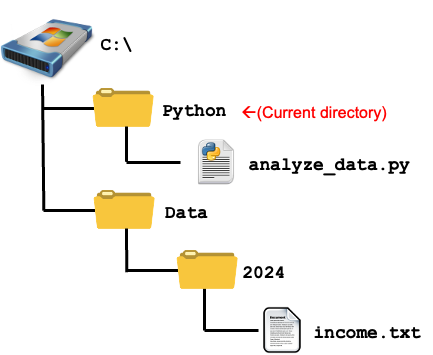

על מנת לגשות לקובץ `income.txt` מהקוד בבקובץ `analyze_data/py` ניתן להשתמש בנתיבים הבאים:

**נתיב מלא (Absolute path)**: 
- `C:\Data\2024\income.txt`

**נתיב יחסי (Relative path):**
- `..\Data\2024\income.txt`

## Text files

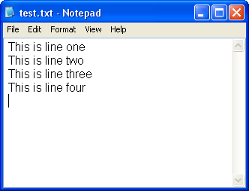

- קבצי טקסט מורכבים מ**שורות**

- כל שורה היא מחרוזת, כלומר **רצף תווים**

- התו האחרון בכל שורה הוא התו המיוחד (escape character) ירידת שורה (`\n`).
    - תזכורת: רצף תוים (בד"כ 2) המתחילים בקו אלכסוני הפוך -`\` - נקראים גם **escape characters**, והם נועדו לסמן תווים שלא ניתן להקיש במקלדת באופן פשוט
    - בד"כ לא נראה תווים הללו זה בעורכי טקסט סטנדרטיים, אלא את התווים שהם אמורים לייצ.
    - לדוגמא, במקום `\n` נראה ירידת שורה


## פתיחת חיבור לקובץ

- הפונקציה `open()` מחזירה אובייקט קובץ

- לרוב משתמשים בה עם שני ארגומנטים:
```python
open(filename, mode)
```
   - `filename`: כתובת של הקובץ (path)
   - `mode`:
      * `'r'` - קריאה
      * `'w'` - כתיבה (מוחק נתונים קודמים)
      * `'a'` - הוספה (לסוף הקובץ הקיים)

## קריאת קובץ שלם

In [ ]:
with open('test_file.txt', 'w') as f:
    f.write('This is a file')

In [ ]:
f = open('test_file.txt', 'r') # returns a file object
s = f.read() # reads the entire file
print(s)
f.close() # releases the file lock, frees resources

אם הקובץ נמצא בתיקייה אחרת – השתמשו בכתובת מלאה. לדוגמה:  

```python
f = open('C:\Users\Desktop\test_file.txt', 'r')
```

#### <span style="color:red">שימו לב לתו המיוחד `\t`</span>


In [ ]:
f = open('test_file.txt', 'r') # running this instead of full path as it does not support Unix systems

## המנעו משימוש בקו אלכסוני הפוך (`\`) בשם הקובץ

מכיוון בקו אכלסוני הפוך נועד כדי לייצג תווים מיוחדים (escape characters), יש להמנע משימוש נאיבי בתו כזה בשם הקובץ. שימוש כזה יגרום ליצירת נתיב קובץ לא צפוי. לדוגמא:

In [5]:
print("C:\Users\Desktop\test_file.txt")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (534476123.py, line 1)

כאלטרנטיבה, ניתן לייצג קווים נוטים בנתיבי הקבצים בצורות הבאות:
- `'C:/Users/Desktop/test_file.txt'`
- `'C:\\Users\\Desktop\\test_file.txt'`


In [4]:
print('C:\\Users\\Desktop\\test_file.txt')
print('C:/Users/Desktop/test_file.txt')

C:\Users\Desktop\test_file.txt
C:/Users/Desktop/test_file.txt


## קריאה שורה לאחר שורה

- ניתן לעבור שורה-שורה באמצעות לולאת `for`

In [ ]:
with open('test_file_multi_line.txt', 'w') as f:
    f.write('This is line1\nThis is line 2\nThe end')

In [ ]:
f = open('test_file_multi_line.txt', 'r')
for line in f:
    print(line, end='')
f.close()

- לחלופין, ניתן להשתמש ב- `readlines()` כדי לקבל רשימה של שורות

In [ ]:
f = open('test_file_multi_line.txt', 'r')
lines = []
for line in f:
    lines.append(line)
f.close() 

# or use readlines()
f = open('test_file_multi_line.txt', 'r')
lines = f.readlines()
f.close()

## ארבע דרכים נפוצות לקריאה מקובץ

1. `f.read()` – קורא את כל הקובץ כמחרוזת אחת
2. `f.readline()` – קורא את השורה הבאה (יחסית למיקום הנוכחי)
3. `f.readlines()` – מחזיר רשימה של כל השורות שנותרו
4. לולאת `for`:
```python
for line in f:
    ...
```

## הערות

- כל פעולת קריאה מקדמת את "הסמן" (cursor) בקובץ
    - לדוגמא, קריאת שורה אחת תקדם את הסמן לשורה הבאה 

- כדי להתחיל מההתחלה, צריך לפתוח את הקובץ מחדש  

- יש לזכור לסגור את הקובץ עם `f.close()`  

- בסוף כל שורה מופיע `\n` — תו ירידת שורה
    - בעת קריאת השורות, אנו בד"כ נרצה להסיר תוים אלו 

In [ ]:
a_line = 'This is a line\nSecond line' 
print(a_line)

## פירוק מחרוזת לתתי מחרוזות – `split()`

- **Parsing** – ניתוח טקסט לפסוקים לפי פורמט מוסכם מראש

- `split()` מפרק מחרוזת לרשימת תתי-מחרוזות לפי תו מפריד

In [ ]:
s = "topeka, kansas city,wichita,,olathe"

cities = s.split(',') 
# If a delimiter is not specified, the string is split to words separated by a sequence of whitespaces.

for city in cities:
     print(city)

## ניקוי תווים מיותרים – `strip()`, `rstrip()`, `lstrip()`

- `strip()` – מסיר תווים מיותרים משני הצדדים

In [ ]:
'   spacious   '.strip()

In [ ]:
'www.example.com'.strip('comwz.')

- `rstrip()` – מסיר רק מהצד הימני

In [ ]:
lines = ['this is line 1\n', 'this is line 2\n', 'the end']
for i in range(len(lines)):
    lines[i] = lines[i].rstrip()
print(lines)

- מה עושה הפונקציה `lstrip()`?

### תרגיל: הדפסת שכיחות מילים

- מטרה: הדפיסו המילים הקובץ `input.txt` לפי שכיחות יורדת

- תחילה ניצור קובץ כזה:

In [ ]:
with open("input.txt", "w") as input_file:
    line = ["a"] * 20 + ["and"] * 10 + ["where"] * 5
    input_file.write(" ".join(line))

- פתרון

In [ ]:
f = open("input.txt", "r")
d = {}
for line in f:
    for word in line.split():
        d[word] = d.get(word, 0) + 1
f.close()

for w in sorted(d, key=d.get):
     print(w + ":", d[w])


## כתיבת מחרוזות לקובץ

- השתמשו ב- `f.write(str)` כדי לכתוב לקובץ

In [ ]:
# open a file (or create it if no such file exists)
f = open('test_file_3.txt', 'w')
f.write("This is a test")
# newline
f.write('\n')

# to write a non-string object, first convert to string
tpl = ('string', 40)
f.write(str(tpl))

# flush data to the file and close it, unlock file, free resources
f.close()

In [ ]:
f = open('test_file_3.txt', 'r')
print(f.read())
f.close()

## דוגמה: כתיבת רשימת מספרים לקובץ טקסט

In [ ]:
my_list = [i**2 for i in range(1,11)] 
#  List comprehension !
# Generates a list of squares of the numbers 1 – 10

In [ ]:
f = open("output.txt", "w")

for item in my_list:
    f.write(str(item) + "\n")

f.close()

# now let's view the output file
f = open('output.txt', 'r')
print(f.read())
f.close()


## שימוש ב-context manager

- במקום `close()` אפשר להשתמש ב-`with`

In [ ]:
# replace this code:
f = open('test_file_multi_line.txt', 'r')
content = f.read()
f.close()

In [ ]:
# with this:
with open('test_file_multi_line.txt', 'r') as f:
    content = f.read()
    
# close is automatically called afterwards

# דוגמאות מסכמות

מה עושה קטע הקוד הבא?

In [ ]:
fname = 'test_file_multi_line.txt'

f = open(fname, 'r') 
lines = f.readlines() 
f.close() 

- המשתנה `lines` מכיל רשימת מחרוזות
- כל שורה מ`fname` היא מחרוזת מהרשימה `lines`

In [ ]:
f = open(fname, 'r')
firstline = f.readline()
secondline = f.readline()
f.close()

- המשתנה `firstline` (מסוג מחרוזת) מכיל את השורה הראשונה מ`fname`
- המשתנה `secondline` מכיל את השורה השניה מ`fname`

In [ ]:
f = open(fname, 'r') 
for l in f: 
    print(l.split()[1])
f.close()

קודה מדפיס את המילה השניה מכל שורה

In [ ]:
outfname = 'myoutput.txt'
outf = open(outfname, 'w')
outf.write('My very own file\n')
outf.close()

הקוד כותב קובץ חדש/דורס קובץ קיים בשם myoutput.txt עם השורה בודדת "My very own file"